### A Cellular Learning Automata Model of Investment Behaviour in the Stock Market

In this section we implement an extension to the paper replicated in the previous section ("The cellular Automaton Model of Investment Behaviour in the Stock Market", by Wei et. al.).

The major improvements in this new model are two:
- the macrofactors are modeled as a stochastic process, and vary randomically during the simulation.
- most importantly, a learning component is introduced, whereby investors assign a reliability score to their neighbours based on their previous ability in making the right investment decisions. Indeed, in this case we talk about a Cellular Learning Automata. 

### References

- [Milad Mozafari, Rahim Alizadeh, A cellular learning automata model of investment behavior in the stock market, Neurocomputing, Volume 122, 2013, Pages 470-479, ISSN 0925-2312, https://doi.org/10.1016/j.neucom.2013.06.002.](https://www.sciencedirect.com/science/article/pii/S0925231213006103)

### Introduction

As in Wei et. al.'s paper ("The Cellular Automaton Model of Investment Behaviour in the Stock Market"), this model uses a three-state (buy/sell/hold) model of the stock market. The difference is that the cellular automata are replaced by new cellular learning automata endowed with properties that allow it to model financial markets more realistically. 

In particular, some learning rules are now added to the model. These are penalty-reward rules, which endow the model with a memory that helps the investors make decisions that are more accurate than in the previous model. 

More precisely, in this model investors trust their neighbors based on their previous decisions and a neighbor that has had more correct predictions is considered more reliable. Furthermore, there is the possibiilty to substitute the macro-factors parameter by a normal random walk to allow for variations in the macrofactors during the investment process. 

### Cellular Learning Automata: Definition and Characteristics

#### Learning Automata

Learning automata are machines that can perform a set of actions with different probabilities. The term *learning* is because they can learn how to perform and react in future steps. With each action they perform, they catch a feedback as a penalty or reward, and this feedback will affect on their subsequent performances (action selection probabilities). 

#### Cellular Learning Automata

A combination of cellular automata and learning automata is a cellular learning automata. In this kind of automata, each cell acts as a learning automaton and its reward or penalty depends on defined rules on neighbor cells. This model has learning capability of learning automata and collective behavior and locality of cellular automata. A d-dimensional CLA is a quintuple $CLA = (Z^d, \phi, A, N, F)$ in which:

*   $Z^d$ is a d-dimensional grid of cells.
*   $\phi$ is a finite set of states that each cell can possess.
*   $A$ is a set of learning automata, that each of them assigned to a specific cell.
*   $N = \{X_1, \dots, X_m\}$ is a finite subset of $Z^d$ that is called neighborhood vector.
*   $F : \phi^m \to \beta$ is the local rule of the CLA. $\beta$ is a set of valid reinforcement signals that can be applied to learning automata.

Cellular learning automata divide into two main groups: synchronous and asynchronous. In a synchronous CLA, different cells are activated synchronously. We use this type of CLAs to construct our model.

![fig1](images/fig1_paper3.png) 

(Fig.1. sourced from the reference paper. $\alpha(n)$ denotes the action selected by the automaton.)


### Methodology

In a stock market, investors with more correct predictions are more reliable. In this learning model, the orignial model by Wei et. al. is endowed with a reliability factor that enables investors to choose the best neighbors in investing process and have a better investment. For this purpose, a reliability weight vector is assigned to each cell. This vector denotes how much a cell can rely on its neighbors. The contents of this vector are real numbers. 

Reliability weights are assumed to be equal at the initial step. As the simulation steps go on, cells update their reliability weight vector by considering previous decisions of their neighbors. Every cell computes the weight of a behavior by summing up the reliability weights of the neighbors who have that behavior.

A virtual boundary around the cellular space of the model is considered. Cells that are in the virtual boundary have constant zero reliability weight. By this assertion, the influence of the cells that are in the virtual boundary of the cellular space is ignored. This is an important difference from the original model, which was characterized by the period boundary condition. 

#### The CLA Model
At first, in order to model stock market of a particular stock, a two-dimensional cellular automata model is used. Each cell has a coordinate, which is specified by a pair $(i, j)$. In this model, every cell represents an investor and adjacent cells are based on the Moore model. 

Cells (investors) have three states $B, H$ and $S$ in which $B$ points to the buy state, $H$ points to the hold state, and $S$ represents the sell state. The state of the cell $(i, j)$ at the time step $t$ is displayed by $S_{(i,j)}(t)$. Also $P_{B;i,j}(t), P_{S;i,j}(t)$ and $P_{H;i,j}(t)$ are the probabilities of $S_{(i,j)}(t) = B$, $S_{(i,j)}(t) = S$ and $S_{(i,j)}(t) = H$ respectively.

They are functions of $S_{(i,j)}(t), S_{(i,j)}^L(t), M_f(t)$ and $P$:

$$
\begin{align*}
P_{B;i,j}(t+1) &= F_B(S_{(i,j)}(t), S_{(i,j)}^L(t), M_f(t), P) \\
P_{S;i,j}(t+1) &= F_S(S_{(i,j)}(t), S_{(i,j)}^L(t), M_f(t), P) \\
P_{H;i,j}(t+1) &= F_H(S_{(i,j)}(t), S_{(i,j)}^L(t), M_f(t), P) 
\end{align*}
$$

where

$$
S_{(i,j)}^L(t) =
\begin{bmatrix}
S_{(i-1,j-1)}(t) & S_{(i-1,j)}(t) & S_{(i-1,j+1)}(t) \\
S_{(i,j-1)}(t) & & S_{(i,j+1)}(t) \\
S_{(i+1,j-1)}(t) & S_{(i+1,j)}(t) & S_{(i+1,j+1)}(t)
\end{bmatrix} \tag{3}
$$

$M_f(t)$ is the macrofactor at the time step $t$, and $P$ is the imitation probability of the investors. If we consider the macrofactor to be constant in each time step, then we display it by $M_f$. 

The interpretation of the $P$ factor is to be intended in the same way as in Wei et. al.'s paper. 

For determining the effects of the learning rules, the original probability functions table is written as below:

$$
\begin{align*}
P_{B;i,j}(t+1) &= F_B(G_B^{(i,j)}(t+1), M_f(t), P) \\
P_{S;i,j}(t+1) &= F_S(G_B^{(i,j)}(t+1), M_f(t), P) \\
P_{H;i,j}(t+1) &= F_H(G_B^{(i,j)}(t+1), M_f(t), P)
\end{align*}
$$

here $G_B^{(i,j)}(t+1)$ denotes the behavior that has greatest reliability weight among the neighbors of the cell $(i, j)$ at the step $t+1$. It is a function of $S_{(i,j)}(t)$ and $S_{(i,j)}^L(t)$. We will explain about this function in the next section.

The probability functions $P_{B;i,j}$, $P_{S;i,j}$ and $P_{H;i,j}$ have two parameters, imitation probability $P$ and macrofactor (at the time step $t$) $M_f(t)$. These functions are formulated in such a way that:

*   In each time step $t$, the following equality holds:
    $P_{B;i,j}(t) + P_{S;i,j}(t) + P_{H;i,j}(t) = 1$.
*   When macro-information is positive (negative), buying (selling) probability will increase.
*   If macro-information is positive (negative) and the greatest reliability weight among the neighbors is not holding, holding probability will decrease.
*   When macro-information is positive (negative) and the greatest reliability weight among the neighbors is not selling (buying), selling (buying) probability will decrease.

During the evolution process the values which are smaller than zero are considered as zero and those which are larger than 1 are regarded as 1.

![fig2](images/fig_2_paper3.png) 

(*Fig. 2., sourced from the original paper. The figure represents the reliability weight vector of cell $x$*)

### Learning Rules

![table1](images/table_1_paper3.png) 

(*Table. 1., sourced from the original paper.*)

![table2](images/table_2_paper3.png)

(*Table. 2., sourced from the original paper.*)

![table3](images/table3_paper3.png)

(*Table. 3., sourced from the original paper.*)

### Reward-Penalty System Explained

In the view of a cell, if a neighbor has had a wrong decision, it catches a penalty and if it has had a right decision, it catches a reward. A decision is wrong if it is not consistent with the macrofactors and majority of investors' decisions (demand for the stock). 

Table 2 shows the reward–penalty rules which determine the reliability weight that investor $x$ considers for the neighbor $x_l$ at the step $t+1$ ($RP_{x,x_l}(t+1)$). In this table, expressions with positive penalty is considered for holders and buyers (sellers) by setting $\alpha=0.5$ (maximum penalty for holders) and no penalty is considered for holders when we choose $\alpha = 0$ (minimum penalty for holders). This satisfies this simple fact that “who has the worst decision should get more penalty”.

The formulas in Table 2, can be summarized as follows:

$$
RP_{x,x_l}(t+1) = \chi_{x,l}(t)C_t \frac{N(x)-N_{x,T^{\max}_t}(t)}{N(x)N_{x,T_{x_l}(t)}(t)} \theta 
$$

where

$$
\chi_{x,l}(t) =
\begin{cases}
1 & T^{\max}_t = T_{x_l}(t) \\
-\alpha & T_{x_l}(t) \neq T^{\max}_t = H \text{ or } T^{\max}_t \neq T_{x_l}(t) = H \\
-(1-\alpha) & \text{otherwise}
\end{cases}
$$

In the above formula $\theta$ is a positive number which is called the coefficient of reliability. The factor

$$
\chi_{x,l}(t)C_t \frac{N(x)-N_{x,T^{\max}_t}(t)}{N(x)N_{x,T_{x_l}(t)}(t)} 
$$

affects on $\theta$ to share the proper amount of reward or penalty among the neighbors. In other words, by the mentioned factor, at the step $t+1$, $\theta$ will be divided between the neighbors of $x$ according to their behaviors at the step $t$. 

When demand for buying (selling) increases at the step $t$, the neighbors who have suggested holding the stock must be considered for a smaller amount of penalty than those who have suggested to sell (buy). We do this by entering an adjusting coefficient $0 \le \alpha \le 0.5$ in $\chi_{x,l}(t)$.



Sometimes it is possible that the behavior that is maximum at the step $t-1$ still remains maximum at the step $t$ ($T^{\max}_{t-1} = T^{\max}_t$), but the number of investors who had this investment behavior decreases ($N_t < N_{t-1}$). In this situation using $C_t$, we decrease the reward of the neighbors who have the behavior $T^{\max}_t$ and the penalty of the other neighbors. 

Also in the case that $T^{\max}_{t-1} = T^{\max}_t$ and $N_t \ge N_{t-1}$, the factor $C_t$ increases the reward of the neighbors who have the behavior $T^{\max}_t$ and the penalty of others. In fact we use $C_t$ to include the influence of whole market changes at step $t$. 

The variable $C_t$ is calculated by:

$$
C_t = 1 + \frac{\Delta_t}{N_{T^{\max}_t}(t)} 
$$

here $\Delta_t$ is the amount of changes from the step $t-1$ to $t$ in the number of investors who have the state $T^{\max}_t$ ($N_{T^{\max}_t}(t) - N_{T^{\max}_{t-1}}(t-1)$). In the case that $T^{\max}_{t-1} \neq T^{\max}_t$, we set $C_t = 1$.

Now, we discuss the remaining factor:

$$
\frac{N(x)-N_{x,T^{\max}_t}(t)}{N(x)N_{x,T_{x_l}(t)}(t)} 
$$

The fraction

$$
\frac{N(x)-N_{x,T^{\max}_t}(t)}{N(x)} 
$$

is the ratio between the number of neighbors of $x$ with a decision that is inconsistent with the decision of the majority ($N(x) - N_{x,T^{\max}_t}(t)$) and all of the non-virtual neighbors ($N(x)$). 

The factor $N_{x,T_{x_l}(t)}(t)$ in the denominator denotes that the more the number of right (wrong) decisions, the lesser reward (penalty) is considered. In a special case, if all of the neighbors of $x$ have a right decision, then no reward is considered for the neighbors. In addition, if all of the neighbors of $x$ have a wrong decision then the same amount of penalty is considered for them. Note that the same amount of penalty or reward for all of the neighbors does not change the reliability of the neighbors from the view of $x$.

The first outcome of our learning rules, at step $t+1$, is $RP_{x,x_l}(t+1)$ which denotes the amount of penalty or reward which an investor $x$ gives to its neighbor $x_l$, regarding the state of the market and neighbors' decision at the step $t+1$. The reliability weight which $x$ considers for its neighbor $x_l$ is updated by the following formula at the step $t+1$:

$$
W_{x,x_l}(t+1) = W_{x,x_l}(t) + RP_{x,x_l}(t+1) 
$$

The behavior that has the greatest reliability weight among the neighbors of the cell $x$ at the step $t+1$ is displayed by $G_B^x(t+1)$ and is calculated by the following formula:

$$
G_B^x(t+1) =
\begin{cases}
B & \max\{W_{x,H}(t+1), W_{x,B}(t+1), W_{x,S}(t+1)\} = W_{x,B}(t+1) \\
S & \max\{W_{x,H}(t+1), W_{x,B}(t+1), W_{x,S}(t+1)\} = W_{x,S}(t+1) \\
H & \max\{W_{x,H}(t+1), W_{x,B}(t+1), W_{x,S}(t+1)\} = W_{x,H}(t+1)
\end{cases}
\tag{12}
$$

where

$$
W_{x,H}(t+1) = \sum_{x_l \text{ is holder}} W_{x,x_l}(t+1) 
$$

$$
W_{x,B}(t+1) = \sum_{x_l \text{ is buyer}} W_{x,x_l}(t+1) 
$$

$$
W_{x,S}(t+1) = \sum_{x_l \text{ is seller}} W_{x,x_l}(t+1) 
$$

Finally using Table 1, we can determine the state of cell $x$ at the step $t+1$. 

![fig3](images/fig3_paper3.png)

(*Fig. 3., sourced from the original paper. The figure exemplifies the notion of virtual boundary.*)

![fig4](images/fig4_paper3.png)

(*Fig. 4., sourced from the original paper. The figure exemplifies the updating of reliability weights.*)

### Algorithm Implementation

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from matplotlib.colors import ListedColormap
import sys

In [ ]:
class MarketSimulator2D_CLA:
    def __init__(self, grid_size, symmetric = False, random_grid_probs = [1/3,1/3,1/3]):
        
        self.grid_size = grid_size

        self.BUY = 1
        self.HOLD = 0
        self.SELL = -1        
        self.neighbor_map = [(i, j) for i in [-1, 0, 1] for j in [-1, 0, 1] if not (i == 0 and j == 0)]
        self.random_grid_probs = random_grid_probs

        ### Grid Variables
        self.STATES = [self.BUY, self.HOLD, self.SELL]
        self.symmetric = symmetric
        self.grid = self.create_random_grid() if self.symmetric == False else self.create_symmetric_grid()

        # Reliability Weights Variables
        self.reliability_weights = np.ones((self.grid_size, self.grid_size, 8))

        self.grid_t_minus_1 = None

        # History Storage variables
        self.history = {"buy":[], "hold":[], "sell":[], "macro_factor":[]}        
        self.current_macro_info = None    
    
    def create_random_grid(self):
        """
        Creates and returns a grid with a random initial state, assuming uniform probabilities for all states, by default.
        Allows custom starting probabilities 
        """

        # Verify that the inputted probabilities list has length 3 and is a stochastic vector
        if isinstance(self.random_grid_probs, list):
            assert np.sum(self.random_grid_probs) == 1
            assert len(self.random_grid_probs) == 3

        return np.random.choice(self.STATES, size=(self.grid_size, self.grid_size), p = self.random_grid_probs)
    
    def create_symmetric_grid(self):
        """ 
        Creates a symmetric grid, analogous to the one presented in the reference paper
        """
        grid = np.full((self.grid_size, self.grid_size), self.SELL, dtype=int)

        buy_sell_length  = self.grid_size//3+1
        hold_length = self.grid_size-buy_sell_length

        start_hold = buy_sell_length//2
        end_hold = -(buy_sell_length//2+buy_sell_length%2)

        grid[start_hold:end_hold, start_hold:end_hold] = self.HOLD

        start_buy =  hold_length//2
        end_buy = -(hold_length//2+hold_length%2)

        grid[start_buy:end_buy, start_buy:end_buy] = self.BUY

        return grid
        
    def get_valid_neighbors_with_indices(self, i, j):

        neighbors = []
        for idx, (di, dj) in enumerate(self.neighbor_map):
            ni, nj = i + di, j + dj

            if 0 <= ni < self.grid_size and 0 <= nj < self.grid_size:
                neighbors.append({'coord': (ni, nj), 'weight_idx': idx})

        return neighbors
    
    def get_greatest_reliability_behavior(self, i, j):
        
        grid = self.grid

        neighbor_info = self.get_valid_neighbors_with_indices(i, j)        
        cell_weights = self.reliability_weights[i, j]

        buy_weight_sum = 0
        hold_weight_sum = 0
        sell_weight_sum = 0

        # Get the weights for each possible state
        for neighbor in neighbor_info:
            ni, nj = neighbor['coord']
            weight_idx = neighbor['weight_idx']
            
            neighbor_state = grid[ni, nj]
            weight = cell_weights[weight_idx]
            
            if neighbor_state == self.BUY:
                buy_weight_sum += weight
            elif neighbor_state == self.HOLD:
                hold_weight_sum += weight
            elif neighbor_state == self.SELL:
                sell_weight_sum += weight

        # Determine the most weighted state
        sums_array = np.array([buy_weight_sum, hold_weight_sum, sell_weight_sum])
        max_sum = np.max(sums_array)

        # Determine if there is a tie
        tie_count = np.sum(sums_array == max_sum)
        
        # NOT EXPLICITLY MENTIONED IN THE PAPER
        # As in Wei's paper implementation, we set up tie-breaking rules based on the macro-information
        if tie_count > 1:         
            macro_information = self.current_macro_info   
            if macro_information == "positive":
                return self.BUY
            if macro_information == "negative":
                return self.SELL
            else:
                return self.HOLD
        else:
            winner_index = np.argmax(sums_array)
            return self.STATES[winner_index]
        
    def calculate_all_rewards_penalties(self, theta, alpha):
        """
        Calculates the reward/penalty matrix based on the transition from grid_t_minus_1 to grid.
        This method implements the learning rules from Section 3.1 of the paper.
        """
        grid_t_minus_1 = self.grid_t_minus_1
        grid_t = self.grid

        rp_matrix = np.zeros_like(self.reliability_weights)

        # The learning process starts after the first step, so grid_t_minus_1 must exist.
        # If it doesn't exist, it won't change anything in the weights, and thus return a 0 reward-penalty matrix
        if grid_t_minus_1 is None:
            return rp_matrix

        # Calculate global counts for the previous (t-1) and current (t) steps
        prev_counts = {s: np.sum(grid_t_minus_1 == s) for s in self.STATES}
        current_counts = {s: np.sum(grid_t == s) for s in self.STATES}

        # Determine the majority behavior (T_max) for both steps
        t_max_prev = max(prev_counts, key=prev_counts.get)
        t_max_current = max(current_counts, key=current_counts.get)

        # --- Determine the Ct parameter (Formula 8) ---
        if t_max_current != t_max_prev:
            ct = 1.0
        else:
            prev_dominant_count = prev_counts[t_max_prev]
            current_dominant_count = current_counts[t_max_current]

            delta_t = current_dominant_count - prev_dominant_count
            ct = 1.0 + (delta_t / current_dominant_count)
        # ---------------------------------------------

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                # For each cell (i,j), evaluate the advice its neighbors gave in grid_t_minus_1

                neighbourhood = self.get_valid_neighbors_with_indices(i, j)
                num_neighbors = len(neighbourhood)
                
                # Count the states of neighbors in the previous and current step
                local_counts_t_minus_1 = {s: 0 for s in self.STATES}
                local_counts_t = local_counts_t_minus_1.copy()
                
                for neighbor in neighbourhood:
                    ni, nj = neighbor['coord']
                    local_counts_t_minus_1[grid_t_minus_1[ni, nj]] += 1
                    local_counts_t[grid_t[ni,nj]] += 1

                # N(x) - N_{x, T_max}(t)
                n_x_t_max = local_counts_t[t_max_current]
                numerator = num_neighbors - n_x_t_max

                # Iterate through each neighbor to calculate its specific reward/penalty
                for neighbor in neighbourhood:
                    ni, nj = neighbor['coord']
                    weight_idx = neighbor['weight_idx']

                    neighbor_state_t = grid_t[ni, nj]
       
                    # --- Determine the Chi (χ) variable (Formula 6) ---
                    if neighbor_state_t == t_max_current:
                        chi = 1
                    # If neighbor was HOLD and HOLD was NOT the majority opinion
                    elif (neighbor_state_t == self.HOLD and t_max_current != self.HOLD) or (neighbor_state_t != self.HOLD and t_max_current == self.HOLD):
                        chi = -alpha
                    else:
                        chi = -(1 - alpha)
                    # -------------------------------------------------

                    # N(x) * N_{x, T_{x_i}}(t)
                    n_x_neighbor_state_t = local_counts_t[neighbor_state_t]
                    denominator = num_neighbors * n_x_neighbor_state_t

                    fraction = numerator / denominator
                    rp = chi * ct * theta * fraction
                    
                    rp_matrix[i, j, weight_idx] = rp

        return rp_matrix

    def get_transition_probabilities(self, majority_state, P, Mf, macro_info): 
            """Calculates transition probabilities based on Table 1 from the Wei et. al's paper."""
            probs = [0.0, 0.0, 0.0] # [prob_buy, prob_hold, prob_sell]

            if macro_info == "positive":
                if majority_state == self.BUY:
                    probs = [P + Mf, (1 - P - Mf) * 0.5, (1 - P - Mf) * 0.5]
                elif majority_state == self.HOLD:
                    probs = [(1 - P) * (0.5 + 0.5 * Mf), P, (1 - P) * (0.5 - 0.5 * Mf)]
                elif majority_state == self.SELL:
                    probs = [(1 - P) * (0.5 + 0.5 * Mf), (1 - P) * (0.5 - 0.5 * Mf), P]
            
            elif macro_info == "negative":
                if majority_state == self.BUY:
                    probs = [P, (1 - P) * (0.5 + 0.5 * Mf), (1 - P) * (0.5 - 0.5 * Mf)]
                elif majority_state == self.HOLD:
                    probs = [(1 - P) * (0.5 + 0.5 * Mf), P, (1 - P) * (0.5 - 0.5 * Mf)]
                elif majority_state == self.SELL:
                    probs = [(1 - P + Mf) * 0.5, (1 - P + Mf) * 0.5, P - Mf]


            elif macro_info == 'none':
                if majority_state == self.BUY:
                    probs = [P, (1 - P) * 0.5, (1 - P) * 0.5]
                elif majority_state == self.HOLD:
                    probs = [(1 - P) * 0.5, P, (1 - P) * 0.5]
                elif majority_state == self.SELL:
                    probs = [(1 - P) * 0.5, (1 - P) * 0.5, P]

            clipped_probs = np.clip(probs, 0, 1)

            prob_sum = np.sum(clipped_probs)

            # if the sum of the probabilities is 0, return uniform probabilities for all states
            if prob_sum == 0:
                return [1/3, 1/3, 1/3]

            # renormalize the probabilities to ensure that they sum to one
            normalized_probs = clipped_probs / prob_sum

            # store the an array containing the transition probabilities for the 3 states, in order: BUY, HOLD, SELL
            return [normalized_probs[0], normalized_probs[1], normalized_probs[2]]

    def update_grid(self, P):

        # generate the new grid which represents the state at the enxt step
        new_grid = np.zeros_like(self.grid)

        macro_factor = self.history["macro_factor"][-1]
        macro_info = self.current_macro_info

        # for each cell in the grid, determine the behaviour with greates reliability, and then determine the transition probabilities for that cell
        # At last determine the state of that cell in the next step
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                greatest_reliability_behaviour = self.get_greatest_reliability_behavior(i, j)                            
                probs = self.get_transition_probabilities(greatest_reliability_behaviour,
                                                        P,
                                                        macro_factor, 
                                                        macro_info)    
                        
                new_grid[i, j] = np.random.choice(self.STATES, p=probs)
        
        # update grid_t_minus_1 and current grid class properties
        self.grid_t_minus_1 = self.grid.copy()
        self.grid = new_grid

    def update_history(self):
        self.history["buy"].append(np.sum(self.grid == self.BUY))
        self.history["hold"].append(np.sum(self.grid == self.HOLD))
        self.history["sell"].append(np.sum(self.grid == self.SELL)) 

    def update_reliability_weights(self,theta, alpha):
        rp_matrix = self.calculate_all_rewards_penalties(theta, alpha)
        self.reliability_weights += rp_matrix   

    def update_macro_factor(self, macro_factor_volatility, clip = False):
        random_step = np.random.normal(loc=0.0, scale=macro_factor_volatility)

        # update the macro-factor, which behaves like a random walk
        macro_factor_current = self.history["macro_factor"][-1] + random_step

        if clip == True:
            # possibility to clip the macro-factor, if needed
            macro_factor_current = np.clip(macro_factor_current, -1, 1)

        # update the macro-factor in the history dictionary
        self.history["macro_factor"].append(macro_factor_current)        

        # update the macroeconomic information
        macro_info_current = "positive" if macro_factor_current > 0 else "negative" if macro_factor_current < 0 else "none"
        self.current_macro_info = macro_info_current

    def run_simulation(self, num_steps, P, alpha, theta, initial_mf=0.0, mf_volatility=0.05, clip_macro_factor = False, generate_new_grid = True):
        
        # Initialize the grid from scratch

        if generate_new_grid == True:
            self.grid = self.create_random_grid() if self.symmetric == False else self.create_symmetric_grid()

        self.grid_t_minus_1 = None
        self.current_macro_info = None

        # Initialize from zero the history dictionary
        self.history = {"buy": [], "hold": [], "sell": [], "macro_factor": []}
        self.reliability_weights.fill(1.0) # Reset weights to 1 for each run
        
        mf_current = initial_mf        
        self.history["macro_factor"].append(mf_current)
        
        # update buy, hold, sell values based on the results of the starting grid
        self.update_history()

        for step in range(num_steps):
            self.update_reliability_weights(theta, alpha)
            self.update_macro_factor(mf_volatility, clip = clip_macro_factor)   
            self.update_grid(P)
            self.update_history()
    
    def plot_grid(self, title=None, ax = None):
        ax = ax
        
        if ax == None:
            fig, ax = plt.subplots(1,1,figsize = (10,10))
        
        cmap = ListedColormap(['red', 'lightgray', 'green'])
        bounds = [-1.5, -0.5, 0.5, 1.5]
        norm = plt.matplotlib.colors.BoundaryNorm(bounds, cmap.N)

        ax.imshow(self.grid, cmap=cmap, norm=norm)
        ax.set_title(title if title else "Current Grid State")
        ax.set_xticks([])
        ax.set_yticks([])

    def plot_hist(self, title=None, ax = None, only_holders = False, holders_color = "grey", hold_label = "Hold"):

        ax = ax

        if ax == None:
            fig, ax = plt.subplots(1,1,figsize = (10,10))         
        
        if only_holders == False:
            ax.plot(self.history["buy"], label="Buy", color='green')
            ax.plot(self.history["sell"], label="Sell", color=  'red')  
        
        ax.plot(self.history["hold"], color = holders_color, label = hold_label)

        ax.set_xlabel('time step')

        if only_holders == False:
            ax.set_ylabel('number of each behaviour')
        else:
            ax.set_ylabel("number of holders")
        ax.grid(True)
        ax.set_title(title if title else "Investment Behavior Over Time")
        ax.legend()

### Replication of the Figures

In [23]:
model = MarketSimulator2D_CLA(50, True)

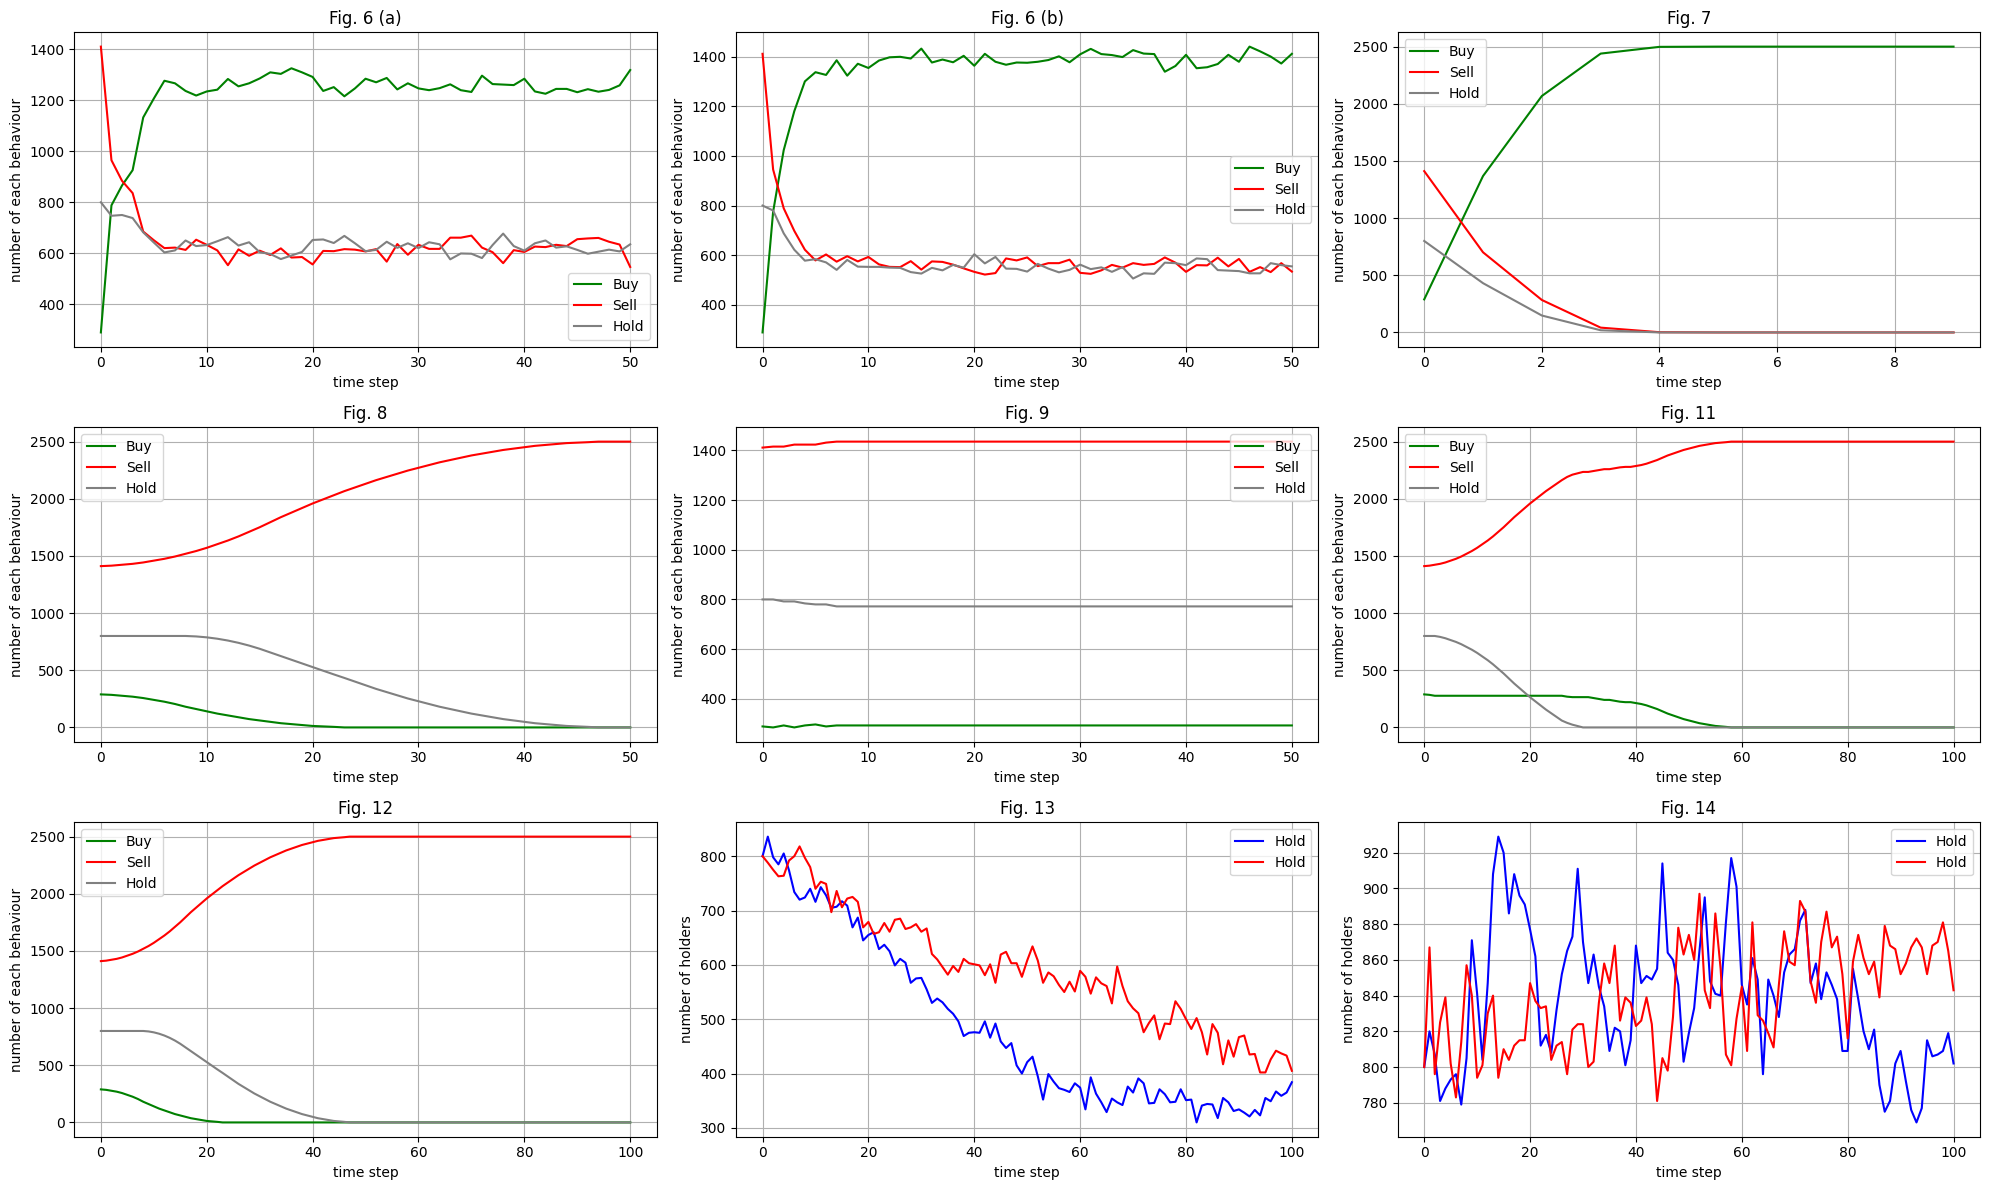

In [24]:
np.random.seed(42) 

fig, axs = plt.subplots(3,3,figsize = (20,12))

# Figure 6 A
model.run_simulation(num_steps=50,
                    P =0.5,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_hist(ax = axs[0,0], title= "Fig. 6 (a)")

# Figure 6 B
model.run_simulation(num_steps=50,
                    P =0.5,
                    alpha= 0,
                    theta= 0,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_hist(ax = axs[0,1], title = "Fig. 6 (b)")

# Figure 7
model.run_simulation(num_steps=9,
                    P =0.5,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.9,
                    mf_volatility= 0)

model.plot_hist(ax = axs[0,2], title = "Fig. 7")

# Figure 8

model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.9,
                    mf_volatility= 0)

model.plot_hist(ax = axs[1,0], title = "Fig. 8")

# Figure 9

model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0,
                    theta= 0,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_hist(ax = axs[1,1], title = "Fig. 9")

# Figure 11

model.run_simulation(num_steps=100,
                    P =1,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(ax = axs[1,2], title = "Fig. 11")


# Figure 12
model.run_simulation(num_steps=100,
                    P =1,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(ax = axs[2,0], title = "Fig. 12")

# Figure 13

model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(only_holders= True, holders_color= "blue", ax =axs[2,1], title = "Fig. 13")

model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(only_holders= True, holders_color= "red", ax = axs[2,1], title = "Fig. 13")

# Figure 14

model.run_simulation(num_steps=100,
                    P =0.5,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(only_holders= True, ax = axs[2,2], holders_color= "blue", title = "Fig. 14")

model.run_simulation(num_steps=100,
                    P =0.5,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_hist(only_holders= True, ax = axs[2,2], holders_color= "red", title = "Fig. 14")

plt.tight_layout()


### Original Figures 6 - 14 (skipping 10, whose replication is presented in following cells)
![fig6](images/fig6_paper3.png) 

![fig7](images/fig7_paper3.png)

![fig_89](images/fig89_paper3.png)

![fig11_12](images/fig11_12_paper3.png)

![fig13_14](images/fig13_14_paper3.png)

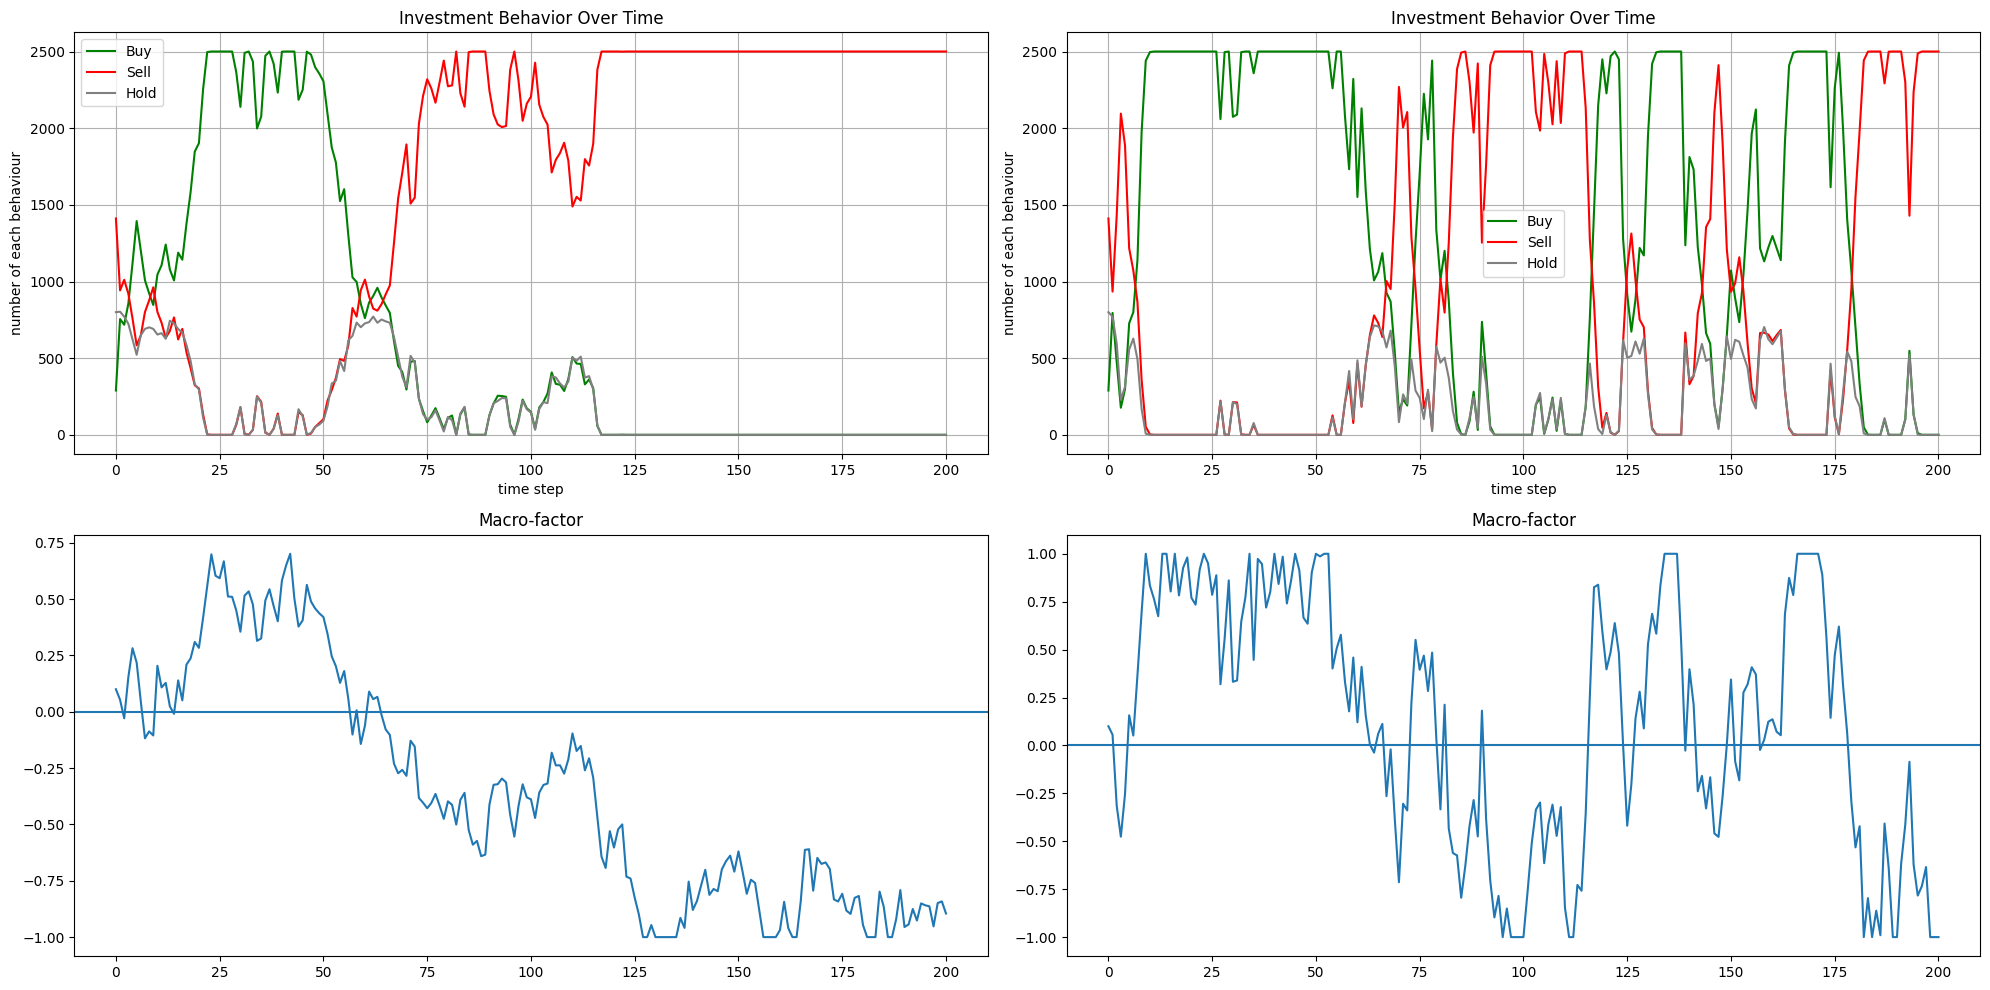

In [56]:
np.random.seed(777)

fig, axs = plt.subplots(2,2,figsize = (20,10))

# Figure 18

model.run_simulation(num_steps=200,
                    P =0.5,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0.1,
                    clip_macro_factor= True)


model.plot_hist(ax = axs[0,0])

axs[1,0].set_title("Macro-factor")
axs[1,0].plot(model.history["macro_factor"]);
axs[1,0].axhline(0)

# Figure 19

model.run_simulation(num_steps=200,
                    P =0.5,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0.3,
                    clip_macro_factor= True)


model.plot_hist(ax = axs[0,1])

axs[1,1].set_title("Macro-factor")
axs[1,1].plot(model.history["macro_factor"]);
axs[1,1].axhline(0)

plt.tight_layout()


### Original Figures 18 - 19

Given the stochastic nature of these simulations, and given that neither the random number generator that was used, nor the seed were made public, it wasn't possible to perfectly replicate these figures. The main cause of the differences that can be seen is the randomness of the macro-factor evolution.

![fig18](images/fig18_paper3.png)

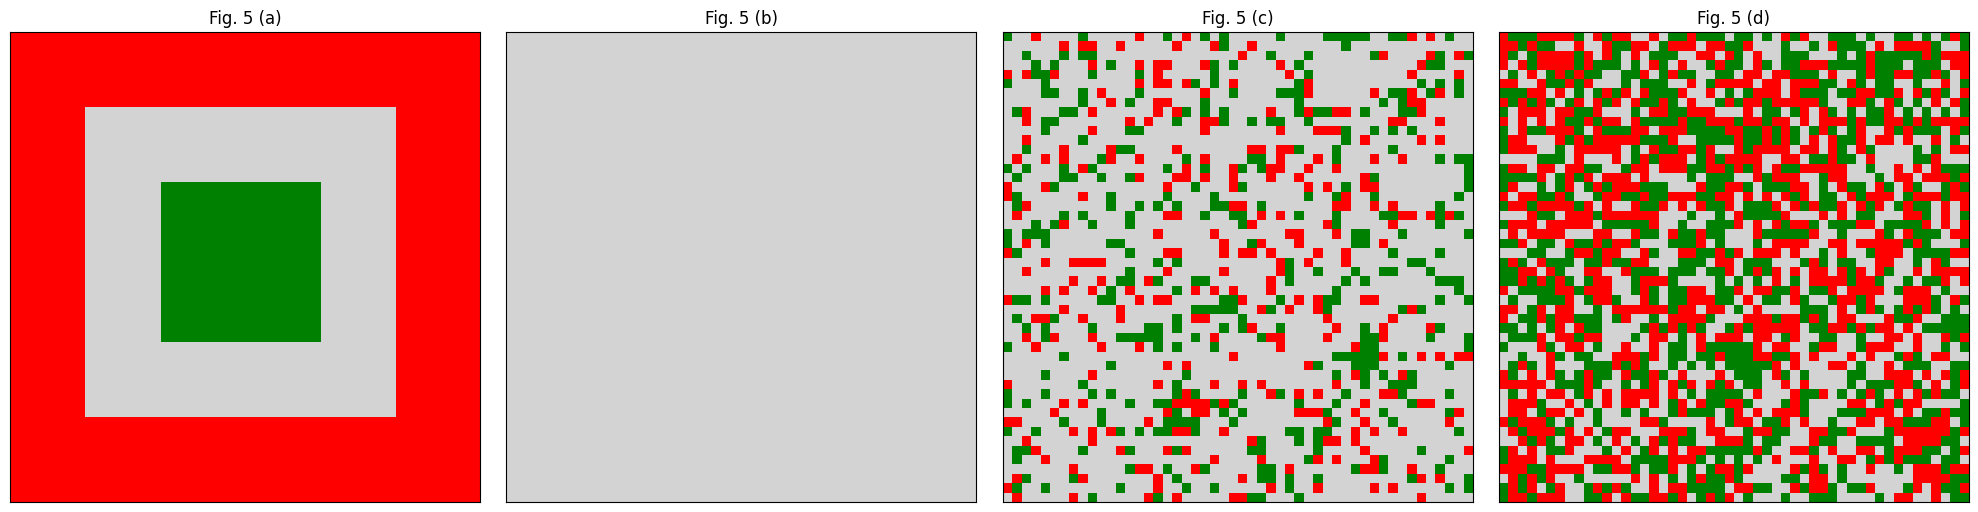

In [29]:
# Figure 5
np.random.seed(100)

fig, ax = plt.subplots(1,4,figsize = (20,5))

model.grid = model.create_symmetric_grid()
model.plot_grid(ax = ax[0], title = "Fig. 5 (a)")


model.run_simulation(num_steps=330,
                    P =1,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_grid(ax = ax[1], title = "Fig. 5 (b)")

model.run_simulation(num_steps=370,
                    P =0.75,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_grid(ax = ax[2], title = "Fig. 5 (c)")

model.run_simulation(num_steps=370,
                    P =0.50,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0)

model.plot_grid(ax = ax[3], title = "Fig. 5 (d)")

plt.tight_layout()


### Original Figure 5

![fig5](images/fig5_paper3.png)

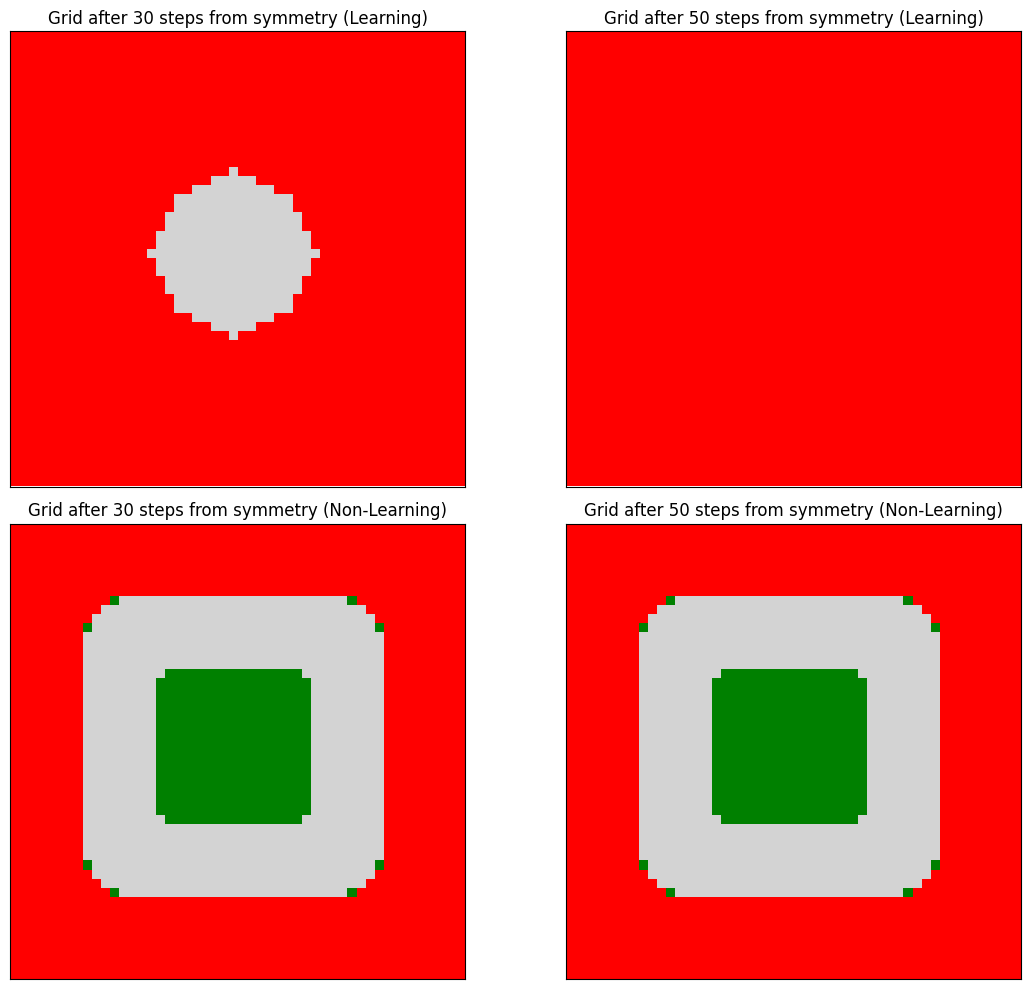

In [17]:
fig, axs = plt.subplots(2,2,figsize = (12,10))

# Figure 10

model.run_simulation(num_steps=30,
                    P =1,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_grid(ax = axs[0,0], title = "Grid after 30 steps from symmetry (Learning)")


model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.25,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_grid(ax = axs[0,1], title = "Grid after 50 steps from symmetry (Learning)")

# Figure 10 (b) (Non-Learning Model)

model.run_simulation(num_steps=30,
                    P =1,
                    alpha= 0.25,
                    theta= 0,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_grid(ax = axs[1,0], title = "Grid after 30 steps from symmetry (Non-Learning)")


model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.25,
                    theta= 0,
                    initial_mf= 0.1,
                    mf_volatility= 0)

model.plot_grid(ax = axs[1,1], title = "Grid after 50 steps from symmetry (Non-Learning)")

plt.tight_layout()



### Original Figure 10

![fig10](images/fig10_paper3.png)

In [5]:
matrix_A = [[-1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,  0, -1,  1,  1,  0,
         0, -1,  1,  1,  0, -1, -1,  1,  1,  0, -1, -1,  1,  0,  0, -1,
        -1,  1],
       [ 1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,  0,  1,  0,
        -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,
         0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0, -1,
         1,  0],
       [ 0, -1,  0,  1, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,
         0,  1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  1, -1,  0,  1, -1,
         0,  1, -1,  0, -1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,
         0,  1],
       [ 0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1,
        -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  0,
         0,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,
        -1,  0],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
         1,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1, -1,  0,
         1, -1],
       [ 1,  0, -1,  1, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,
         0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,
         0,  1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1, -1,  1,  0,
        -1,  1],
       [-1, -1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0, -1,
        -1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0,
        -1, -1],
       [ 0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1, -1, -1, -1,  0,  0,
         1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  0,  0,  0,  1,  1,
        -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1,  1, -1, -1,
         0,  0],
       [ 1, -1,  0,  1,  0,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1,
        -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0,
         1,  0,  1, -1,  0, -1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,
         0,  1],
       [ 1,  0, -1, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1, -1,  0, -1,  0, -1,  0,  1,
         0,  1, -1,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,
         1, -1],
       [ 0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,
         1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,
         1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1,
        -1,  0],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
         0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  0,
         0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
         1,  1],
       [ 1,  0,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1, -1,  1,  0,
        -1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0,
        -1,  1,  0, -1, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,
         0, -1],
       [ 1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  1, -1,
         1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,
         1, -1,  1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,
         1, -1],
       [ 0,  0,  1, -1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,
         0,  1],
       [ 1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0, -1,  1, -1,  1,  0,
        -1,  0, -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  0,
        -1,  1,  0,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,
         0,  1],
       [-1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,
         1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  0,  0, -1,  1,  1,
         0,  0, -1,  1,  1,  0,  0, -1,  1,  1,  0,  0, -1,  1,  1,  0,
         0, -1],
       [-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 0,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1, -1,  0,  1,  1, -1,
         0,  0,  1, -1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1],
       [-1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  0,  0, -1,  1,
         0, -1,  1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0, -1,
        -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,
         0, -1],
       [ 1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0, -1,
         0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1,
        -1,  0, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,
         1, -1],
       [ 0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  0,  1,  1,  1, -1, -1,
         0,  0,  0,  1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,
        -1,  0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  1, -1, -1, -1,  0,
         0,  0],
       [ 0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1,  1, -1,  0,  1,
        -1,  0,  1,  1, -1,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,
         0,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  0,  0,  1,
        -1,  0],
       [ 1, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1,
        -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,
         0, -1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0,
         1,  0],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0,
        -1,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0],
       [-1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,
         0, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1,  1,  1,  0,
         0, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  1, -1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,
         0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  1, -1,
         0,  1],
       [-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1,  0, -1, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,
         1,  0],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
         1, -1],
       [ 1, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1,
        -1,  1, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,
         1, -1,  0, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,
         0,  1],
       [ 1,  0,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0,  1,
         0, -1,  0, -1,  1, -1,  1,  0,  1,  0,  1,  0, -1,  0, -1,  1,
        -1,  1,  0,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1, -1,  1,  0,
         1,  0],
       [ 1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1],
       [-1,  1,  1,  0,  0, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1,
        -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1,
        -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1,
        -1,  1],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,
         0, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  0, -1,  1,  0,  1,
         0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,
         0, -1],
       [ 0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1, -1, -1,  0,  1,  1,
        -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,
         1,  1, -1,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,
         0,  0],
       [-1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,
         0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,
         1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,
         0, -1],
       [ 1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,  0,
         1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0,
        -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1,
        -1,  1],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1],
       [ 1,  0, -1, -1,  1,  0,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,
         1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0,
         0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0, -1,
        -1,  1],
       [-1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,
        -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0, -1, -1,  1,  1,  0,
         0, -1],
       [-1, -1,  1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,
         1,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1,  0, -1, -1, -1,
        -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,
        -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1,  0, -1,  0, -1,  1,
        -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  0,  1,
         0,  1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1],
       [ 1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,
         1, -1,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,
         0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,
         0, -1],
       [ 0,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,
         0,  0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,
         1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        -1, -1]]

matrix_B = [[ 0,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,  0,
         0,  0,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  1,
         1, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,
         0,  1],
       [ 0,  0,  0,  1,  1,  1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,
        -1, -1, -1,  0,  0,  0,  1,  1,  1, -1, -1, -1,  0,  0,  0,  1,
         1,  1,  1, -1, -1, -1,  0,  0,  0,  1,  1,  1, -1, -1, -1,  0,
         0,  0],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,
        -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1],
       [ 0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,
         1, -1, -1,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1,
        -1,  0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,
         1,  1],
       [-1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0, -1,  1,  1,  0,
        -1, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,
         0, -1, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0, -1, -1,
         1,  0],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         0,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,
         0,  0,  1,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1,  1, -1,
        -1,  0],
       [ 0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,
         1, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,
         0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,  0,  0,
         1, -1],
       [ 0,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1, -1,  0,  1,  1, -1,
         0,  1,  1, -1,  0,  1,  1, -1,  0,  0,  1, -1,  0,  0,  1, -1,
         0,  0,  1, -1,  0,  0,  1, -1,  0,  0,  0, -1, -1, -1,  1,  1,
         1,  0],
       [-1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0, -1,
        -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,
        -1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,
        -1,  1],
       [-1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1, -1,
         1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,
         0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,
        -1, -1],
       [-1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,
         0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1,
        -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,
         0,  0],
       [-1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,
         0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,
         0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,
         1,  1],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
         0,  0],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1,
         0, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
         0,  1,  0,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        -1,  0],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
         0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
         0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  1,  1,
         1,  1],
       [ 1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  0, -1,  0,  1,
        -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0,
         1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,
         0,  1],
       [-1, -1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0, -1,
        -1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1, -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1,
        -1, -1],
       [-1, -1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0, -1,
        -1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1, -1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0,
        -1, -1],
       [-1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,
        -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1,  1,  1,  0,
         0, -1],
       [-1,  1,  0, -1, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0,
        -1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0,
         0, -1,  1,  0,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1, -1,  1,
         0, -1],
       [ 1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0,
        -1,  1,  0, -1,  0,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1,
        -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1, -1,
         0,  1],
       [ 1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1,  0, -1,  1, -1,
         1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0, -1,  1, -1,
         1,  0, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  1,  0,
         1,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,
         1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
         0,  0],
       [ 1, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1,
        -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  0, -1,
         0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,  0,
        -1,  0],
       [-1, -1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  0,
         1, -1],
       [ 0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,
         0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  0,
         1, -1],
       [ 0,  0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  1,
         1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1, -1, -1, -1,
        -1,  0,  0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  1,
         1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  0],
       [-1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,
         0, -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,
         0,  0],
       [-1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,  0,  0, -1,  1,  1,
        -1,  1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,
         0, -1,  1, -1,  1,  0, -1,  0, -1,  1,  0, -1,  0, -1,  1,  0,
         1,  0],
       [-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
         0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
         1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        -1, -1],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1],
       [ 1,  1,  0, -1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  0,
        -1,  1,  1,  0, -1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,
         0, -1,  1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,
         1,  0],
       [ 0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,
         0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,
         1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1,
        -1, -1],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0,
        -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  0, -1,  1,
         0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  0, -1,
         1,  0],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1,
         0, -1],
       [ 0,  1, -1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0, -1,
         0,  1],
       [ 0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,
         1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  0,  1,
        -1, -1],
       [-1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1, -1,
         0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,
         1,  1],
       [ 1, -1,  1, -1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,
         0,  1,  0,  1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  1,  0,
         1,  0],
       [-1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1,
        -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1,
        -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1,  1,  1,  0,  0, -1,
        -1,  1],
       [ 0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,
         0,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  0,  0,  0,  1,
         1, -1, -1,  0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1, -1,
        -1, -1],
       [ 1, -1,  1, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1,
        -1,  1, -1,  0, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,
         1, -1,  1, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1,  0,  1,
        -1,  1],
       [-1,  1,  1,  0, -1, -1,  1,  0,  0, -1, -1,  1, -1, -1,  0,  1,
        -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,
         1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1,
         0,  1],
       [ 0,  0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  1,  1,
         1,  1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1, -1, -1, -1,  0,
         0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  1,  1,  1,
         1, -1],
       [-1, -1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,
         0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  0,  0,  0,  0, -1, -1,
        -1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1,  0,
         0,  0],
       [ 1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0,
        -1, -1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0, -1,  1,
         0,  0, -1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  0, -1,
         1,  1],
       [ 1, -1,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1,  1,  0,  1,  0,  1,  0,  1,  0,  0, -1, -1,
        -1, -1],
       [ 0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,
         1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1,
        -1, -1]]

matrix_C = [[-1, -1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,
         0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  0,  0,  0,  0, -1,
        -1, -1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1, -1,  1, -1,  0,
        -1,  0],
       [-1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0, -1,  1,  1,  0,
        -1, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,
         0, -1, -1,  1,  0,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1, -1,
         1,  0],
       [ 0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  0,
         1,  1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1, -1,
        -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  0,
         0,  1],
       [ 1,  0,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1,
        -1,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1, -1,
         1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,  1,
        -1,  1],
       [-1, -1, -1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1, -1,  1,  1,
         1,  1,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  0,  0,
         0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  0,  0,  0,  0, -1, -1,
        -1,  1],
       [ 0,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  0,  1, -1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1, -1,  0,  1, -1, -1,  0,
         0,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,
        -1,  0],
       [-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
         0,  0],
       [-1, -1,  1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0,  0,
        -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,
         0, -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,
         0,  0],
       [-1,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1,
         1,  1,  0, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  0,  0, -1,
         1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  1,
         1,  0],
       [ 1,  0, -1,  1, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0,  1,
         0, -1,  1,  0,  1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  0,
        -1,  1,  0, -1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1, -1,
         1,  0],
       [ 1, -1,  1, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  1,
         0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,  0, -1,
         1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  0, -1, -1,  1,
         0, -1],
       [-1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1, -1,
        -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        -1, -1],
       [ 1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,
         1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  1, -1,  0,  1,
        -1,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0, -1,  0,  1, -1,
         0,  1],
       [-1,  1,  0, -1,  1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,
         1,  0, -1,  1,  0,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  1,
         0, -1,  1,  0,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  1,  0,
        -1,  1],
       [ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,
         0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,  0,  0,
         0,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,  1, -1, -1,  0,
         1,  1],
       [-1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
         1,  1],
       [-1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,
         1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,
         1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,
         1,  0],
       [ 1,  0, -1,  1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  0, -1,
         0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,
         0, -1],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1, -1,  0, -1, -1,
         1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,
         1,  0,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  1,
         0,  0],
       [ 0,  0,  1,  1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  1,
         1, -1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,
         0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1, -1,  0,  0,  1,
         1, -1],
       [ 1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,  0,
         1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  1,
        -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1,
        -1,  1],
       [-1,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1,
         1,  0,  0, -1,  1,  0,  0, -1,  1,  0,  0, -1,  1,  0, -1, -1,
         1,  0, -1, -1,  1,  0, -1,  1,  1,  0, -1,  1,  1,  0, -1,  1,
         1,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
         1, -1],
       [ 0,  1, -1,  0,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1, -1,  0,
         1, -1,  0,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  0,  1,
        -1,  0,  1,  1, -1,  0,  1, -1, -1,  0,  1, -1,  0,  0,  1, -1,
         0,  1],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1,  1,  1,  0,  0, -1,
        -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1,  1,  1,  0,  0, -1,
        -1,  1,  0,  0, -1, -1,  1,  1,  0, -1, -1,  1,  1,  0,  0, -1,
         1,  1],
       [ 1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  0, -1,  1,  0,  1,  0,
        -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,
         0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0, -1,
         1, -1],
       [ 0,  1, -1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1,
         1, -1, -1,  0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1,
        -1,  0],
       [ 1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  1, -1,  0, -1,  0,
         1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  1,
        -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  1,  0,  1,
        -1,  1],
       [ 1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0,
        -1,  1,  0, -1,  1,  0, -1, -1,  1,  0, -1,  1,  0, -1,  1,  0,
        -1, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,
         0, -1],
       [-1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,
         0, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
         0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
         0,  0],
       [ 0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,
         0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,
         1, -1],
       [ 1, -1,  0, -1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,
         1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1],
       [ 1, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0,  1,  0,  1,
        -1,  0, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0, -1,  0,  1, -1,
         1, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0,  1,  0,  1,
        -1,  0],
       [ 0,  0,  1,  1,  1, -1, -1,  0,  0,  0,  1,  1,  1, -1, -1,  0,
         0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,
        -1,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  0,
         1,  1],
       [-1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1, -1,
         1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,
         0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,
         0, -1],
       [ 1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0,
        -1,  1,  0,  1,  0, -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,
         0, -1,  1, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1, -1,
        -1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1,
        -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0, -1, -1,
        -1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1,
        -1, -1],
       [ 0,  0,  1,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1,  0,  0,
         0,  1,  1, -1, -1,  0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  1,
         1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1,  1,
        -1, -1],
       [ 0,  1, -1,  0,  1, -1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  1,
        -1,  0],
       [ 1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,
         0, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1,
        -1,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0,
        -1,  0],
       [-1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,
        -1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,
         1,  1, -1,  0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1,  1,
        -1,  0],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
         0,  0],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  1,  0,
        -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,  1,
         0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,
         1,  0],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1,
        -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1],
       [-1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1],
       [ 1,  0,  0, -1,  1,  0,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,
         1, -1,  1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1, -1,  1,
         0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,
         0,  1],
       [-1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  0,
         0, -1,  1,  1,  0, -1, -1,  1,  0,  0, -1,  1,  1,  0, -1, -1,
         1,  0, -1, -1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,  0,  0,
        -1,  1],
       [-1, -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1,
        -1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,
        -1,  1,  1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1,
         1,  1]]

matrix_D = [[-1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1,  0,  0, -1, -1, -1, -1, -1,
         1,  1],
       [-1, -1, -1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,
         1,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  0,  0,  0,
        -1, -1, -1, -1,  1,  1,  1,  1,  0,  0,  0, -1, -1, -1, -1,  1,
         1,  1],
       [-1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0,
         0, -1, -1, -1,  1,  1,  1,  0,  0,  0, -1, -1, -1,  1,  1,  1,
         0,  0,  0, -1, -1, -1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,
         1,  0],
       [-1, -1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,
         1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,
         1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,
         1,  0],
       [-1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,
         0,  0, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  0,  0, -1,
        -1,  1,  1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,  1,  1,
         0,  0],
       [-1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1,  1,  1,  1,  0, -1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1, -1],
       [ 0,  0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  1,  1,
         1, -1, -1, -1, -1,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1,  0,
         0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  1,  1,  1,
         1, -1],
       [ 1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0,  1,  0, -1,
         0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1,  0,  1,
         0, -1,  0, -1,  0, -1,  1, -1,  1,  0,  1,  0, -1,  0, -1,  1,
        -1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 1, -1,  0, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  0,
        -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  0, -1,  0, -1,
         0,  1,  0,  1,  0,  1, -1,  1, -1,  0,  0,  1,  1, -1, -1,  0,
         1,  1],
       [ 0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  0,  1,  1, -1, -1, -1,
         0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  0,  1,  1, -1, -1, -1,
         0,  0,  0,  1,  1, -1, -1, -1,  0,  0,  0,  1,  1, -1, -1, -1,
         0,  0],
       [-1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1, -1,
        -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1],
       [-1, -1, -1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,
         1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,
         1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  0,  0,
         0,  0],
       [-1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,  1,
         1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1,  1],
       [ 0, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  0, -1,  0,
         1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,
         1,  0,  1, -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  1,  0,  1,
        -1,  0],
       [-1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  0,  0, -1,  1,
         1,  0,  0, -1,  1,  1,  0,  0, -1,  1,  1,  0, -1, -1,  1,  1,
         0, -1, -1,  1,  1,  0, -1, -1,  1,  0,  0, -1, -1,  1,  0,  0,
        -1, -1],
       [ 0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1,  0,  0,
         1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  0,  1,
        -1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1,
        -1,  0],
       [ 1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,
         1,  0,  1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1,  0,  1,
         0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,
         0,  0],
       [ 1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,  1,
        -1,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1, -1,
         1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  1, -1,  1, -1,  1,
         0,  1],
       [ 1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0,  1,
         0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1,
        -1,  0,  1,  0,  1, -1,  0, -1,  0,  1,  0,  1, -1,  0, -1,  0,
         1, -1],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  0,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,
         0,  1],
       [ 0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1, -1, -1,  0,
         0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1,  0,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,
         1, -1],
       [ 0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,
         1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1],
       [-1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,  0,  0,  0, -1, -1,
         1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,
         1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,
         1,  0],
       [ 0,  1,  1, -1,  0,  0,  1, -1,  0,  0,  1, -1, -1,  0,  1,  1,
        -1,  0,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,  0,  1,
         1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,  0,  1,  1, -1,  0,
         0,  1],
       [ 1,  0, -1,  0, -1,  1,  0, -1,  0, -1,  1,  0, -1,  0, -1,  1,
         0, -1,  0, -1,  1,  0, -1,  0, -1,  1,  0,  1,  0, -1,  1,  0,
         1,  0, -1,  1,  0,  1,  0, -1,  1,  0,  1,  0, -1,  1, -1,  1,
         0, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1, -1,  1,  1, -1, -1,  0,  0,  0,  1,  1,  1, -1, -1,  0,
         0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,
         0,  1,  1, -1, -1, -1,  0,  0,  1,  1,  1, -1, -1,  0,  0,  0,
         1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1],
       [-1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0,
        -1, -1,  1,  1,  0,  0, -1, -1,  1,  0,  0, -1, -1,  1,  1,  0,
         0, -1],
       [ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,
         0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,
        -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,
         1,  0],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  0,  1,  0,
         1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
         1,  1,  1, -1,  0,  0,  1, -1, -1,  0,  1,  1, -1,  0,  0,  1,
        -1, -1],
       [ 1,  0,  1,  0,  1,  0, -1,  0, -1,  1, -1,  1, -1,  1,  0,  1,
         0,  1,  0, -1,  0, -1,  1, -1,  1, -1,  1,  0,  1,  0, -1,  0,
        -1,  0, -1,  1, -1,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,
         1, -1],
       [-1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,  0, -1, -1, -1,
         1,  1,  0,  0,  0, -1, -1,  1,  1,  0,  0,  0, -1, -1,  1,  1,
         1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1, -1,  1,  1,  0,
         0, -1],
       [ 0,  0,  1,  1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,
         0,  0,  1,  1, -1, -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1,
        -1,  0,  0,  1,  1, -1,  0,  0,  1,  1, -1, -1,  0,  0,  1,  1,
        -1,  0],
       [ 1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
         1,  0],
       [-1,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1,
        -1,  1,  1,  1,  1,  0,  0,  0,  0, -1, -1, -1, -1, -1,  1,  1,
         1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  1,
         0,  0],
       [ 1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  1,  0, -1,  1,
         0, -1, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  1,  0,
        -1,  1,  0, -1, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,
         1,  0],
       [ 1, -1,  1,  0,  1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1,  0,
        -1,  0, -1,  1, -1,  1, -1,  1, -1,  1,  0,  1,  0,  1,  0,  1,
         0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  1, -1,  1, -1,  1, -1,
         1,  0],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1,  0,
         1, -1,  0,  1, -1,  0,  1, -1, -1,  1, -1,  0,  1, -1,  0, -1,
         0,  1],
       [ 0,  0,  1,  1,  1, -1, -1,  0,  0,  1,  1, -1, -1, -1,  0,  0,
         1,  1, -1, -1, -1,  0,  0,  1,  1, -1, -1, -1,  0,  0,  1,  1,
        -1, -1, -1,  0,  0,  1,  1, -1, -1,  1, -1, -1,  0,  0,  1,  1,
        -1, -1],
       [ 0, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  1, -1,  0,
         1, -1,  0, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1, -1,  1,
        -1,  0,  1, -1,  0, -1,  0,  1, -1,  0,  1,  0,  1, -1,  0,  1,
        -1,  1],
       [ 1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,
         1,  0, -1,  0, -1,  1,  0, -1,  1,  0,  1,  0, -1,  1,  0, -1,
         1,  0,  1,  0, -1,  1,  0, -1,  1, -1,  1,  0, -1,  1,  0, -1,
         0, -1],
       [-1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0, -1, -1, -1,  1,
         1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,  1,  1,  0,  0,
        -1, -1, -1,  1,  1,  0,  0, -1, -1,  1,  1,  1,  0,  0, -1, -1,
         1,  1],
       [ 0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1, -1, -1,  0,  0,  0,
         0,  1,  1,  1,  1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,
         1, -1, -1, -1, -1,  0,  0,  0,  0,  1,  1,  1,  1, -1, -1, -1,
        -1, -1],
       [ 0,  1, -1,  0,  1, -1,  0,  1, -1,  0,  1, -1, -1,  0,  1, -1,
         0,  1, -1,  0,  1, -1,  1,  0, -1,  1,  0, -1,  1,  1,  0, -1,
         1,  0, -1,  1,  0,  0, -1,  1,  0, -1,  1,  0,  0, -1,  1,  0,
        -1,  1],
       [ 1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1, -1,  1, -1,  0, -1,
         0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  0, -1,  0,  1,  0,  1,
        -1,  0, -1,  0,  1, -1,  1, -1,  0,  1,  0,  1, -1,  1, -1,  0,
         1,  0]]

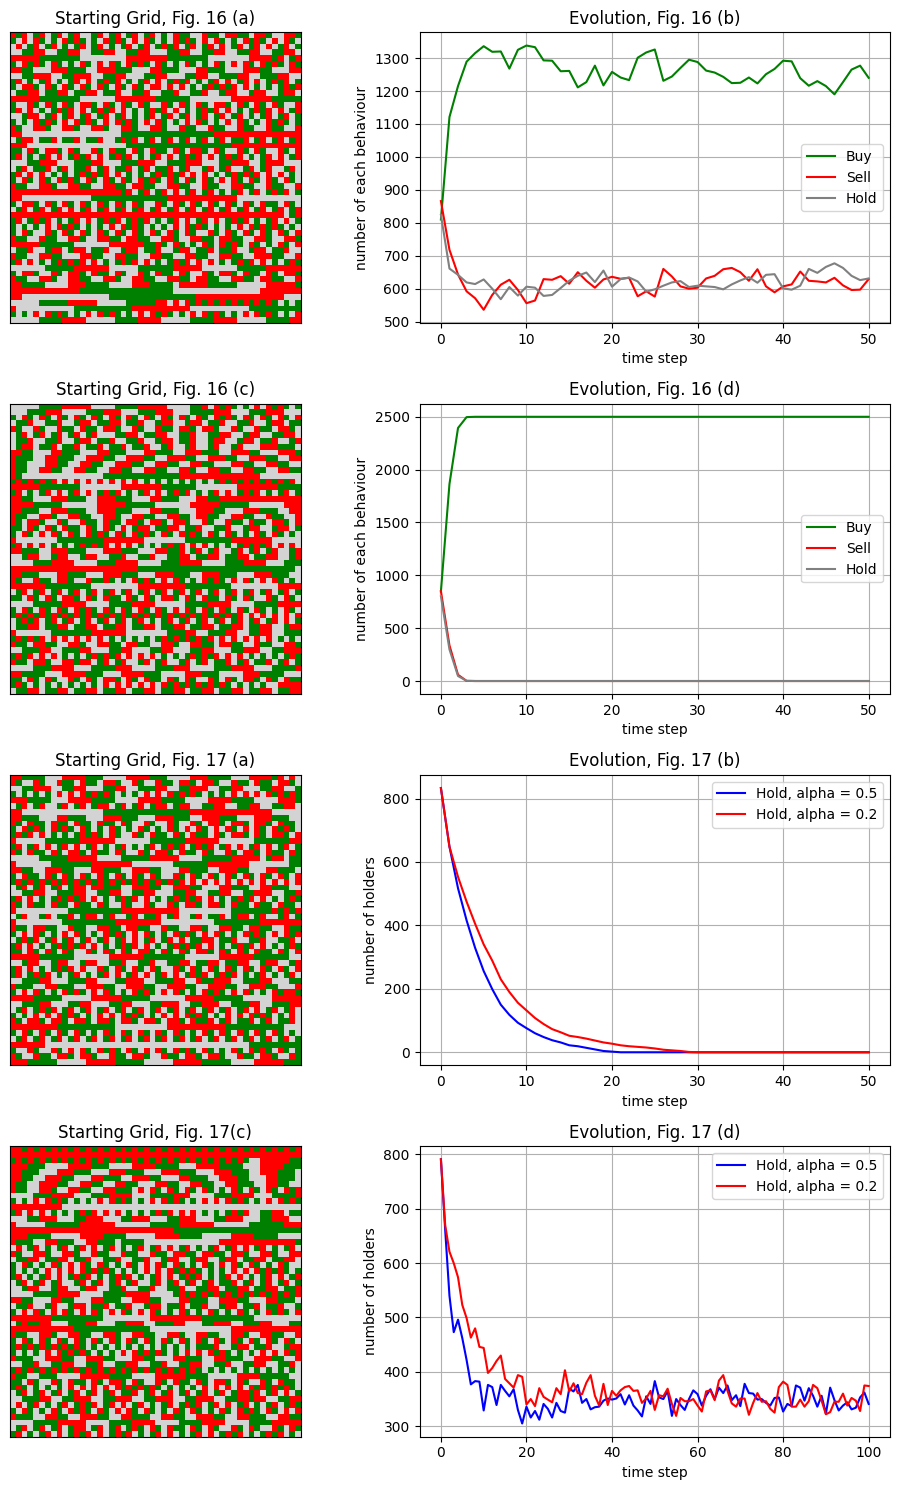

In [ ]:
fig, axs = plt.subplots(4,2,figsize = (10,15))

np.random.seed(444)

model = MarketSimulator2D_CLA(50, False)

# Figure 16 (a)
model.grid = np.array(matrix_A, dtype=int)
# model.grid = model.create_random_grid()
model.plot_grid(ax = axs[0,0], title = "Starting Grid, Fig. 16 (a)")

model.run_simulation(num_steps=50,
                    P =0.5,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0.1,
                    mf_volatility= 0,
                    generate_new_grid= False)

model.plot_hist(ax = axs[0,1], title = "Evolution, Fig. 16 (b)")

# # Figure 16 (b)
model.grid = np.array(matrix_B, dtype=int)
# model.grid = model.create_random_grid()
model.plot_grid(ax = axs[1,0], title = "Starting Grid, Fig. 16 (c)")

model.run_simulation(num_steps=50,
                    P =0.5,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0.9,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(ax = axs[1,1], title = "Evolution, Fig. 16 (d)")

# Figure 17 (a)
model.grid = np.array(matrix_C, dtype=int)
# model.grid = model.create_random_grid()
grid = model.grid.copy()

model.plot_grid("Starting Grid, Fig. 17 (a)", ax = axs[2,0])

very_small_positive_number = sys.float_info.min

model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= very_small_positive_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "blue", only_holders= True, ax = axs[2,1], title = "Evolution, Fig. 17 (b)", hold_label= "Hold, alpha = 0.5")

model.grid = grid
model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= very_small_positive_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "red", only_holders= True, ax = axs[2,1], title = "Evolution, Fig. 17 (b)", hold_label= "Hold, alpha = 0.2")

# Figure 17 (b)

model.grid = np.array(matrix_D, dtype=int)
# model.grid = model.create_random_grid()
grid = model.grid.copy()

model.plot_grid(ax = axs[3,0], title = "Starting Grid, Fig. 17(c)")

model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= very_small_positive_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "blue", only_holders= True, ax = axs[3,1], title = "Evolution, Fig. 17 (d)", hold_label= "Hold, alpha = 0.5")

model.grid = grid
model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= very_small_positive_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "red", only_holders= True, ax = axs[3,1], title = "Evolution, Fig. 17 (d)", hold_label= "Hold, alpha = 0.2")

plt.tight_layout()

### Original Figures 16 and 17

These figures were based on randomized starting points which we couldn't exactly replicate, we resorted to using approximations of the actual grids shown in the paper.

It's also relevant to underline that the downward trend of Fig. 17 (b,d) can only be replicated by setting "SELL" (or "BUY") as default state when there are deadlocks (this is the reason why we used the biggest possible negative integer as an input, given the way the code is structured). Alternatively, using a symmetric grid and the ordinary "HOLD" default state for deadlocks, we can achieve close results for Fig. 17, again.

We show this below.


![fig16](images/fig16_paper3.png)

![fig17](images/fig17_paper3.png)

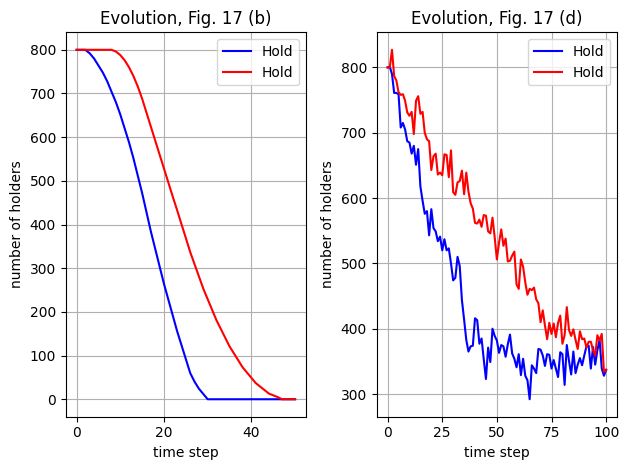

In [ ]:
fig, axs = plt.subplots(1,2)

model.grid = model.create_symmetric_grid()
grid = model.grid.copy()

model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "blue", only_holders= True, ax = axs[0], title = "Evolution, Fig. 17 (b)", hold_label= "Hold, alpha = 0.5")

model.grid = grid
model.run_simulation(num_steps=50,
                    P =1,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= 0,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "red", only_holders= True, ax = axs[0], title = "Evolution, Fig. 17 (b)", hold_label= "Hold, alpha = 0.2")

model.grid = grid
model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.5,
                    theta= 0.02,
                    initial_mf= very_small_negative_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "blue", only_holders= True, ax = axs[1], title = "Evolution, Fig. 17 (d)", hold_label= "Hold, alpha = 0.5" )

model.grid = grid
model.run_simulation(num_steps=100,
                    P =0.75,
                    alpha= 0.2,
                    theta= 0.02,
                    initial_mf= very_small_negative_number,
                    mf_volatility= 0,
                    generate_new_grid = False)

model.plot_hist(holders_color= "red", only_holders= True, ax = axs[1], title = "Evolution, Fig. 17 (d)", hold_label= "Hold, alpha = 0.2")

plt.tight_layout()

We report here the conclusion of the paper we've replicated. 

### Conclusion

We can summarize the obtained results as follows:

*   The amount of imitation value plays an important role in the stability of the stock market and more amount of this factor results in more unstability in the market.
*   A learning model with the reliability factor and learning rules helps to have a model closer to a real stock market. This factor helps the investors to have a better decision. In addition, it refines the impact of the imitation factor.
*   Macrofactor is another key factor that affects stability of the stock market. If the amount of this factor is in the range [-0.5, 0.5], we would have a more stable market, but if the value of this factor exceeds this range, we would expect an unstable market.
*   The holder's controller factor plays an important role in the stability of holders. Without this factor, investors react with holders like other investors but by using it, holders accept less risk and catch less penalty than the other investors. Also, their decision is not considered as a completely wrong or right decision.